# Chapter 2 - Getting Started

In [1]:
import pyjags
import os

# this import assumes pjbcmassistant.py is ONE folder
# above this notebook. You may need to redirect it if
# you get a ModuleNotFoundError.
nb_path = os.getcwd()
parent_path = os.path.split(nb_path)[0]
os.chdir(parent_path)
from pjbcmassistant import ModelHandler, SampleHandler
os.chdir(nb_path)

In [2]:
spec = """
model:
Rate_1.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
k = 5
n = 10

sample:
theta
k
"""

model_spec = ModelHandler(spec)

pyjags_model = pyjags.Model(**model_spec.get_model_args())
sample_data = pyjags_model.sample(**model_spec.get_sample_args())

sample_handler = SampleHandler(sample_data)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


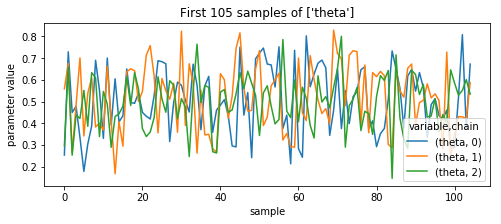

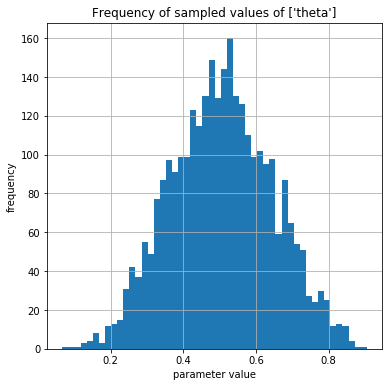

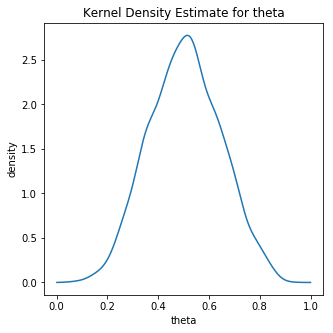

maximum density observed across 1000 bins was at x = 0.5150


In [3]:
sample_handler.vizchains('theta', range=105)
sample_handler.vizhist('theta')
sample_handler.vizkde('theta', showmax=True)

In [4]:
sample_handler.summarize()

,mean,std dev,median,mode,HPD,95CI
k,5.000000,0.000000,5.000000,5.005000,"[5.0, 5.0]","[5.0, 5.0]"
theta,0.506144,0.140497,0.506462,0.532334,"[0.243, 0.784]","[0.244, 0.784]"
